# Assignment set 2 

#### Job Marcelis, Ernani Hazbolatow, Koen Verlaan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.gray_scott import plot_gray_scott, animate_gray_scott
from src.diffusion import plot_many_dla, compute_fractal_dimensions, stochastic_runs_fd
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 120

### Exercise 2.1: Diffusion Limited Aggregation

In [ ]:
plot_many_dla((100, 100), [0, 1, 2], 1000)

Computing fractal dimension for η = 0.50
Termination at step 2949 with 0.5
Fractal Dimension for η=0.50: 1.783
Computing fractal dimension for η = 0.67
Termination at step 1919 with 0.6666666666666666
Fractal Dimension for η=0.67: 1.652
Computing fractal dimension for η = 0.83
Termination at step 1164 with 0.8333333333333333
Fractal Dimension for η=0.83: 1.454
Computing fractal dimension for η = 1.00
Termination at step 1095 with 1.0
Fractal Dimension for η=1.00: 1.512
Computing fractal dimension for η = 1.17
Termination at step 1008 with 1.1666666666666665
Fractal Dimension for η=1.17: 1.456
Computing fractal dimension for η = 1.33
Termination at step 596 with 1.3333333333333333
Fractal Dimension for η=1.33: 1.436
Computing fractal dimension for η = 1.50
Termination at step 490 with 1.5
Fractal Dimension for η=1.50: 1.360
Computing fractal dimension for η = 1.67
Termination at step 344 with 1.6666666666666665
Fractal Dimension for η=1.67: 1.266
Computing fractal dimension for η = 1.83

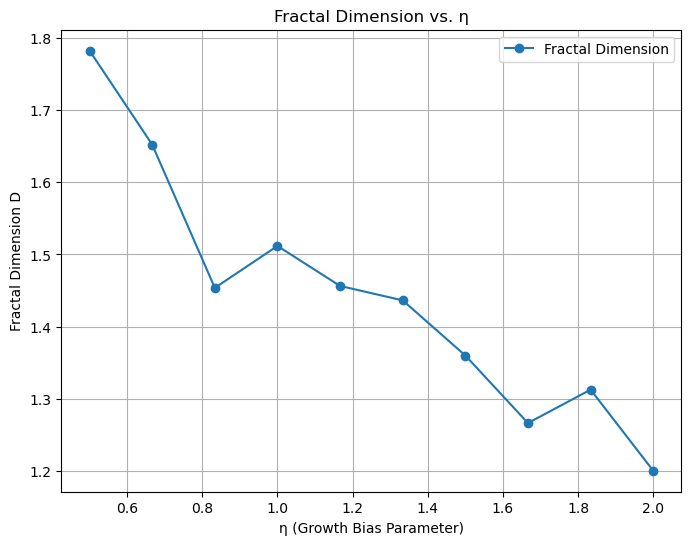

In [2]:
# Run for single iterations
eta_values = np.linspace(0.5, 2.0, 10)  
eta_vals, fractal_dims = compute_fractal_dimensions(eta_values)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(eta_vals, fractal_dims, marker='o', linestyle='-', label="Fractal Dimension")
plt.xlabel("η (Growth Bias Parameter)")
plt.ylabel("Fractal Dimension D")
plt.title("Fractal Dimension vs. η")
plt.legend()
plt.grid()
plt.show()

In [ ]:

# Run the function with multiple stochastic trials
eta_values = np.linspace(0.5, 2.0, 5)  
eta_vals, fractal_means, fractal_stds = stochastic_runs_fd(eta_values, runs=25, grid_size=(100,100))

# Save them into a .npz file
np.savez("stochastic_fractal.npz", eta_vals=eta_vals, fractal_means=fractal_means, fractal_stds=fractal_stds)
data = np.load("stochastic_fractal.npz")

# Extract them
eta_vals = data["eta_vals"]
fractal_means = data["fractal_means"]
fractal_stds = data["fractal_stds"]

# Plot the results with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(eta_vals, fractal_means, yerr=fractal_stds, fmt='o-', label="Fractal Dimension (Mean ± Std)")
plt.xlabel("η (Growth Bias Parameter)")
plt.ylabel("Fractal Dimension D")
plt.title("Fractal Dimension vs. η (Averaged over Multiple Runs)")
plt.legend()
plt.grid()
plt.show()

Computing fractal dimension for η = 0.50 over 25 runs...
  Run 1/25 for η = 0.50
Termination at step 2450 with 0.5
  Run 2/25 for η = 0.50
Termination at step 2447 with 0.5
  Run 3/25 for η = 0.50
Termination at step 2573 with 0.5
  Run 4/25 for η = 0.50
Termination at step 2515 with 0.5
  Run 5/25 for η = 0.50
Termination at step 2824 with 0.5
  Run 6/25 for η = 0.50
Termination at step 2898 with 0.5
  Run 7/25 for η = 0.50
Termination at step 2923 with 0.5
  Run 8/25 for η = 0.50
Termination at step 2877 with 0.5
  Run 9/25 for η = 0.50


SystemError: CPUDispatcher(<function solve_laplace at 0x000002B224326F20>) returned a result with an exception set

### Exercise 2.2: Monte Carlo DLA

### Exercise 2.3: The Gray-Scott model

The Gray-Scott model describes a system of chemical reaction where two different species $U$ and $V$ are present. The corresponding reaction-diffusion equations are:
\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla^2 u - u v^2 + f(1 - u), \\
\frac{\partial v}{\partial t} &= D_v \nabla^2 v + u v^2 - (f + k)v.
\end{align}

where $D_u$ and $D_v$ are diffusion constants, $f$ is the rate at which $U$ is supplied, and $f+k$ is the rate at which $V$ decays.

In this experiment, we will investigate different parameter values for $f$ and $k$ and plot/animate the resulting concentration of the species $U$. Below are some parameters that can be modified by the user, including grid size $N$, $dx$, and $dt$

In [ ]:
animation_time = 32000
num_frames = 400

N = 300
dx = 1
dt = 1

Below we have four different parameter combinations. The first two values represent $D_u$ and $D_v$, which are fixed, and the last two values represent $f$ and $k$. The latter three patterns ($\theta$, $\lambda$, and $\mu$) are from J. E. Pearson, SCIENCE, 1993.

In [ ]:
# Original (parameter combination listed in assignment)
param_comb_1 = np.array([0.16, 0.08, 0.035, 0.060], dtype=float)
# theta pattern
param_comb_2 = np.array([0.16, 0.08, 0.04, 0.06], dtype=float)
# lambda pattern
param_comb_3 = np.array([0.16, 0.08, 0.04, 0.065], dtype=float)
# mu pattern
param_comb_4 = np.array([0.16, 0.08, 0.05, 0.065], dtype=float)

We now plot each parameter combination at three different time steps:

In [ ]:
# Plot original pattern
plot_gray_scott(times=[1000, 5000, 15000], N=N, dx=dx, dt=dt, params=param_comb_1)

In [ ]:
# Plot theta pattern
plot_gray_scott(times=[1000, 5000, 15000], N=N, dx=dx, dt=dt, params=param_comb_2)

In [ ]:
# Plot lambda pattern
plot_gray_scott(times=[2000, 8000, 30000], N=N, dx=dx, dt=dt, params=param_comb_3)

In [ ]:
# Plot mu pattern
plot_gray_scott(times=[5000, 50000, 150000], N=N, dx=dx, dt=dt, params=param_comb_4)

Since the evolution of the system can hard to visualise with static plots, we have implemented functionality to animate the system. The used can insert the parameter combination.

In [ ]:
ani = animate_gray_scott(num_frames=num_frames, time=animation_time, N=N, dx=dx, dt=dt, params=param_comb_3)
HTML(ani.to_jshtml())